# CS498 Project, Team 31, Phase 2
## Sentiment Analysis of Social Media as a predictor for Bitcoin price volatility

### Use a subset of the data collected (specifically 10/01/2017 to 12/31/2017) and conduct sentiment analysis of comments to plot the results against the historical price fluctuations studied in Phase 1. 

#### Extract simple sentiments (format: totalScore, PositiveScore, NegativeScore, Comment_id, created_utc) from Bitcoin subreddit using nltk

In [ ]:
#Adapted from https://github.com/dewarim/reddit-data-tools/blob/master/src/main/python/scoreCommentsJson.py
#Run Command: python scoreCommentsJson.py /data/location/reddit_comments.bz2 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

import bz2
import json
import sys
import os.path

sid = SentimentIntensityAnalyzer()
archive = ""
if len(sys.argv) > 1:
    archive = sys.argv[1]
else:    
    print("No command line arguments given - exiting")
    sys.exit()

print("Working on file: " + archive)
score_file_name = archive.replace("bz2", "sentiment")
if os.path.exists(score_file_name):
    print("sentiment file already exists")
    sys.exit()

bz_file = bz2.BZ2File(archive, 'rb', 1000000)
score_file = open(score_file_name, 'w')

commentCount = 0
while True:
    line = bz_file.readline().decode('utf8')
    if len(line) == 0: break
    comment = json.loads(line)
    id = comment["id"]
    body = comment["body"]
    subreddit_id = comment["subreddit_id"]
    created_utc = comment["created_utc"]
    if subreddit_id == 't5_2s3qj': #If subreddit is Bitcoin
        # variables to hold the overall average compound score for message
        finalScore = 0
        roundedFinalScore = 0
        # variables to hold the highest positive score in the message
        # and highest negative score in the message
        maxPosScore = 0
        maxNegScore = 0
        commentLines = tokenize.sent_tokenize(body)
        for line in commentLines:
            ss = sid.polarity_scores(line)
            lineCompoundScore = ss['compound']
            finalScore += lineCompoundScore

            if ss['pos'] > maxPosScore:
                maxPosScore = ss['pos']
            elif ss['neg'] > maxNegScore:
                maxNegScore = ss['neg']

        # roundedFinalScore is the average compound score for the entire message
        commentLength = len(commentLines)
        if commentLength == 0:
            commentLength = 1
        roundedFinalScore = round(finalScore / commentLength, 4)
        score_file.write("{0}\t{1}\t{2}\t{3}\t{4}\n".format(roundedFinalScore, maxPosScore, maxNegScore, id, created_utc))
        commentCount += 1
        if commentCount % 1000 == 0:
            print(commentCount)
bz_file.close()
score_file.close()

#### The sentiment is stored in XXX.sentiment file. Time to plot graph for first 1000 comments (that aren't zero rated) in Oct 2017

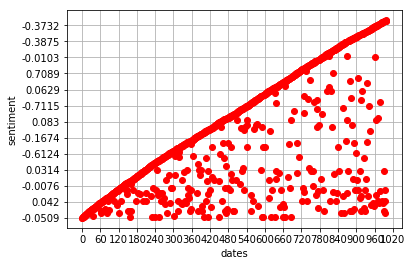

In [72]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import csv
ploty = []
plotx = []
with open('data/RC_2017-10.sentiment', newline='') as csvfile:
    creader = csv.reader(csvfile, delimiter='\t')
    for row in creader:
        if row[0]!='0.0':
            plotx.append(row[4])
            ploty.append(row[0])
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.yaxis.set_major_locator(plt.MaxNLocator(15))
ax.grid()
plt.plot(ploty[:1000],'ro')
plt.xlabel('dates')
plt.ylabel('sentiment')
plt.xticks(fontsize=10,rotation=0)
plt.show()

#### Yup we definitely see a trend. Stay tuned..